In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from keras.utils.np_utils import to_categorical
import datetime

from lib import tally, reorient

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Add, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [2]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(3,3), padding='same', 
           activation='relu', input_shape = (40, 120, 1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), padding='same', 
           activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(3,3), 
           padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation = "softmax")
])

In [3]:
# weight_dir = 'weights'
# weight_name = 'weights.h5'
# model.load_weights(os.path.join(weight_dir, weight_name))

model.load_weights('.mdl_wts.hdf5')

['[0.     0.9122 0.0878]']
6679.891 ms


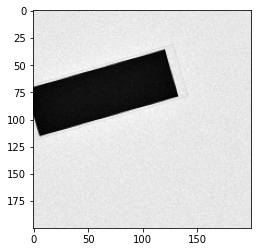

In [4]:
path = r"C:\Users\user\Jupyter Works\20220526_응바공세미나팀플\XrayBat-master\gen_normal\output"
fname = 'res200_run001_fort.22'

dimension = (200, 200, 1)
image_3d = tally.usrbin(os.path.join(path, fname), dimension)
image_2d = image_3d[:,:,0]
image_2d = (image_2d / image_2d.max() * -1) + 1
img_clean = reorient.reorient(image_2d)
img_norm = reorient.normalize(img_clean)
vol = img_norm

vol = np.expand_dims(vol, axis=-1)
vol = np.expand_dims(vol, axis=0)

plt.imshow(image_3d[:,:,0], cmap='gray')

start_time = datetime.datetime.now()
result = model.predict(vol)
end_time = datetime.datetime.now()

time_diff = end_time - start_time
execution_time = time_diff.total_seconds() * 1000

x = list(map(lambda result :str(result), result.round(4)))
print(x)
print(execution_time, 'ms')

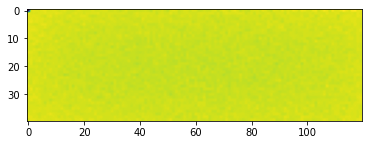

In [5]:
plt.imshow(img_norm)